In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

base_file_path = '../../data/'


df = pd.read_csv(base_file_path+'polished3_with_gdp.csv')

male = df[df["Sex"] == "M"]
female = df[df["Sex"] == "F"]

used_columns = ["Height", "BMI", "Age", "GDP"]

bio_by_sport_male = male.groupby(['Event'])[used_columns].mean().reset_index()
bio_by_sport_female = female.groupby(['Event'])[used_columns].mean().reset_index()

In [32]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = used_columns

scaler = StandardScaler()

means_male = bio_by_sport_male[columns_to_normalize].mean()
stdvs_male = bio_by_sport_male[columns_to_normalize].std()
means_female = bio_by_sport_female[columns_to_normalize].mean()
stdvs_female = bio_by_sport_female[columns_to_normalize].std()

bio_by_sport_male[columns_to_normalize] = scaler.fit_transform(bio_by_sport_male[columns_to_normalize])
bio_by_sport_female[columns_to_normalize] = scaler.fit_transform(bio_by_sport_female[columns_to_normalize])


bio_by_sport_male.head()
bio_by_sport_female.head()
bio_by_sport_male.to_csv("bio_by_sport_male.csv", index=False)
bio_by_sport_female.to_csv("bio_by_sport_female.csv", index=False)


In [33]:
k_values = range(2, 13)
silhouette_scores_male = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport_male[used_columns])
    score = silhouette_score(bio_by_sport_male[used_columns], clusters)
    silhouette_scores_male.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores_male})
silhouette_scores_df.sort_values(by='Score')

,k,Score
1,3,0.243810
0,2,0.263005
6,8,0.276150
7,9,0.282001
8,10,0.285665
9,11,0.291594
10,12,0.295282
4,6,0.299903
5,7,0.299930
2,4,0.305405


In [34]:
k_values = range(2, 13)
silhouette_scores_female = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport_female[used_columns])
    score = silhouette_score(bio_by_sport_female[used_columns], clusters)
    silhouette_scores_female.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores_female})
silhouette_scores_df.sort_values(by='Score')

,k,Score
3,5,0.214486
5,7,0.222622
1,3,0.235878
0,2,0.238034
2,4,0.239534
4,6,0.244256
7,9,0.262011
8,10,0.264237
10,12,0.269571
9,11,0.280210


In [35]:
# Define average values for males and females
AVG_HEIGHT_MALE = (178.4 - means_male["Height"]) / stdvs_male["Height"]  # cm
AVG_BMI_MALE = (25.5 - means_male["BMI"]) / stdvs_male["BMI"]
AVG_AGE_MALE = (31 - means_male["Age"]) / stdvs_male["Age"]
AVG_GDP_MALE = (12688 - means_male["GDP"]) / stdvs_male["GDP"]

AVG_HEIGHT_FEMALE = (164.7 - means_female["Height"]) / stdvs_female["Height"]
AVG_BMI_FEMALE = (24.7 - means_female["BMI"]) / stdvs_female["BMI"]
AVG_AGE_FEMALE = (32 - means_female["Age"]) / stdvs_female["Age"]
AVG_GDP_FEMALE = (12688 - means_female["GDP"]) / stdvs_female["GDP"]

# Append global averages for both males and females
bio_by_sport_male = bio_by_sport_male._append({'Event': 'Global average Male',
                                      'Height': AVG_HEIGHT_MALE,
                                      'BMI': AVG_BMI_MALE,
                                      'Age': AVG_AGE_MALE,
                                      'GDP': AVG_GDP_MALE}, ignore_index=True)

bio_by_sport_female = bio_by_sport_female._append({'Event': 'Global average Female',
                                      'Height': AVG_HEIGHT_FEMALE,
                                      'BMI': AVG_BMI_FEMALE,
                                      'Age': AVG_AGE_FEMALE,
                                      'GDP': AVG_GDP_FEMALE}, ignore_index=True)

# Display the updated DataFrame
bio_by_sport_male.head()


,Event,Height,BMI,Age,GDP
0,Archery Men's Individual,-0.024231,0.016170,0.214606,0.376219
1,Archery Men's Team,0.090818,0.076625,-0.063119,0.924464
2,"Athletics Men's 1,500 metres",-0.030022,-1.229790,-0.561410,-0.427992
3,"Athletics Men's 10,000 metres",-0.771281,-1.400186,0.088763,-0.555559
4,Athletics Men's 100 metres,-0.188917,-0.303388,-0.605329,-0.531815


In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
bio_by_sport_male['Cluster'] = kmeans.fit_predict(bio_by_sport_male[used_columns])
bio_by_sport_male.sort_values(by='Cluster')

,Event,Height,BMI,Age,GDP,Cluster
223,Global average Male,-0.013727,0.516715,1.331628,-0.145215,0
158,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",-0.631198,0.066945,2.154620,-1.250278,0
157,Shooting Mixed Skeet,-0.248134,0.293778,1.726307,-0.968731,0
156,"Shooting Mixed Running Target, 50 metres",-0.040070,0.163918,0.901281,-1.239929,0
154,"Shooting Mixed Free Rifle, Three Positions, 30...",-0.458722,0.007962,0.963187,-1.467081,0
...,...,...,...,...,...,...
99,Gymnastics Men's Parallel Bars,-1.499620,-0.544296,-0.775784,-0.262139,2
192,Weightlifting Men's Bantamweight,-2.883170,-0.426237,-0.434731,-0.907076,2
193,Weightlifting Men's Featherweight,-2.464570,-0.076423,-0.254300,-1.048143,2
33,Boxing Men's Featherweight,-1.341414,-1.339700,-1.213713,-1.125788,2


In [37]:
kmeans = KMeans(n_clusters=5, random_state=42)
bio_by_sport_female['Cluster'] = kmeans.fit_predict(bio_by_sport_female[used_columns])
bio_by_sport_female.sort_values(by='Cluster')

,Event,Height,BMI,Age,GDP,Cluster
70,Football Women's Football,-0.102991,-0.032685,-0.101353,1.129407,0
36,Boxing Women's Middleweight,1.561006,0.964534,0.142272,1.485184,0
104,Sailing Women's One Person Dinghy,0.345484,0.361654,-0.101410,1.158809,0
101,Sailing Mixed Three Person Keelboat,-1.482596,0.225226,3.900897,0.280722,0
39,"Canoeing Women's Kayak Singles, 200 metres",0.143523,0.498159,0.553018,0.858128,0
...,...,...,...,...,...,...
74,Gymnastics Women's Horse Vault,-2.164506,-0.973044,-1.691816,-1.384866,4
75,Gymnastics Women's Individual All-Around,-2.226965,-0.966285,-1.689933,-1.030716,4
76,Gymnastics Women's Team All-Around,-2.289014,-1.006386,-1.699443,-0.921828,4
80,Judo Women's Extra-Lightweight,-2.108637,-0.707735,-0.280129,-0.432523,4


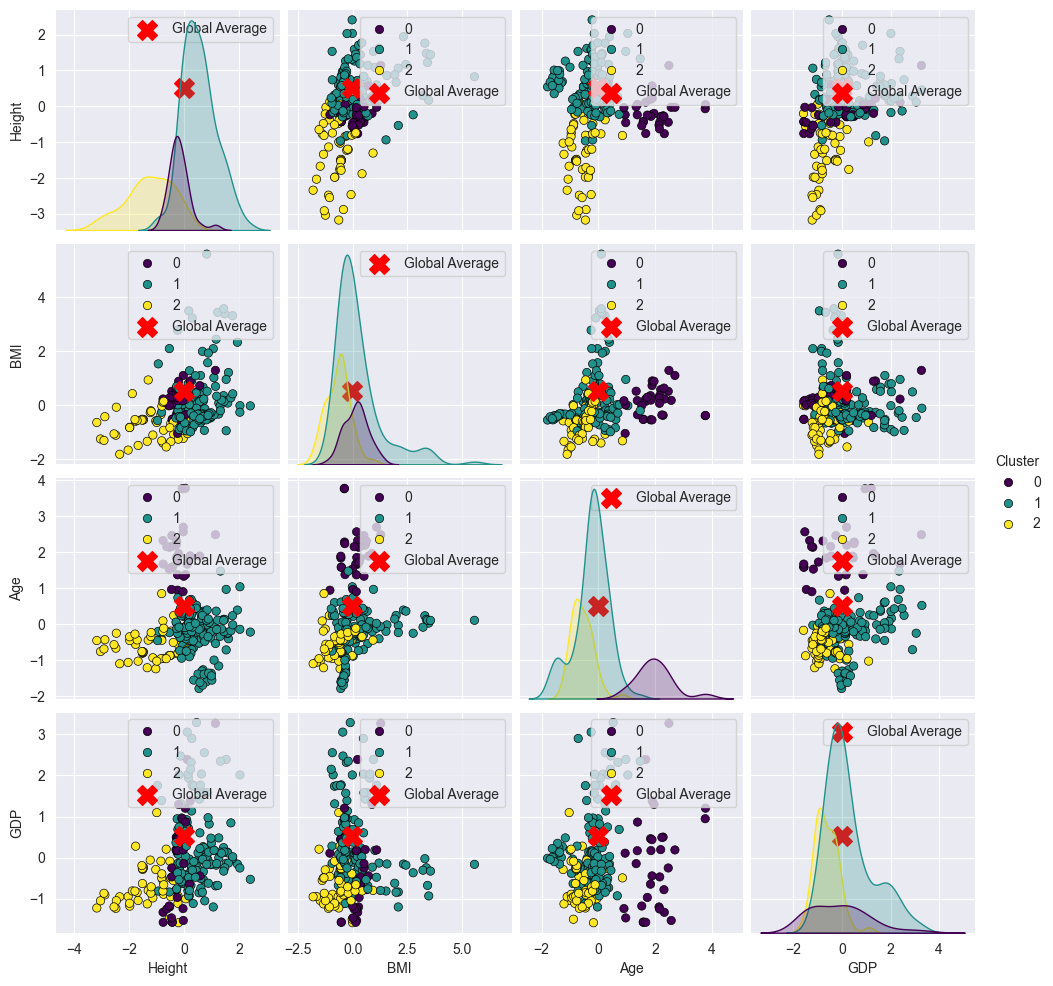

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to indicate if the point is the global average
bio_by_sport_male['Is_Global_Average'] = bio_by_sport_male['Event'] == 'Global average Male'

# Create a pairplot with hue based on the 'Cluster' column and highlight the global average
pairplot = sns.pairplot(bio_by_sport_male, 
                         hue='Cluster', 
                         vars=['Height', 'BMI', 'Age', 'GDP'], 
                         palette='viridis', 
                         plot_kws={'edgecolor': 'black'})

# Highlight the global average points
for ax in pairplot.axes.flatten():
    # Set the marker to X for global average points
    ax.scatter(bio_by_sport_male[bio_by_sport_male['Is_Global_Average']]['Height'], 
               bio_by_sport_male[bio_by_sport_male['Is_Global_Average']]['BMI'],
               color='red', s=200, label='Global Average', marker='X')
    ax.legend(loc='upper right')

# Show the plot
plt.show()


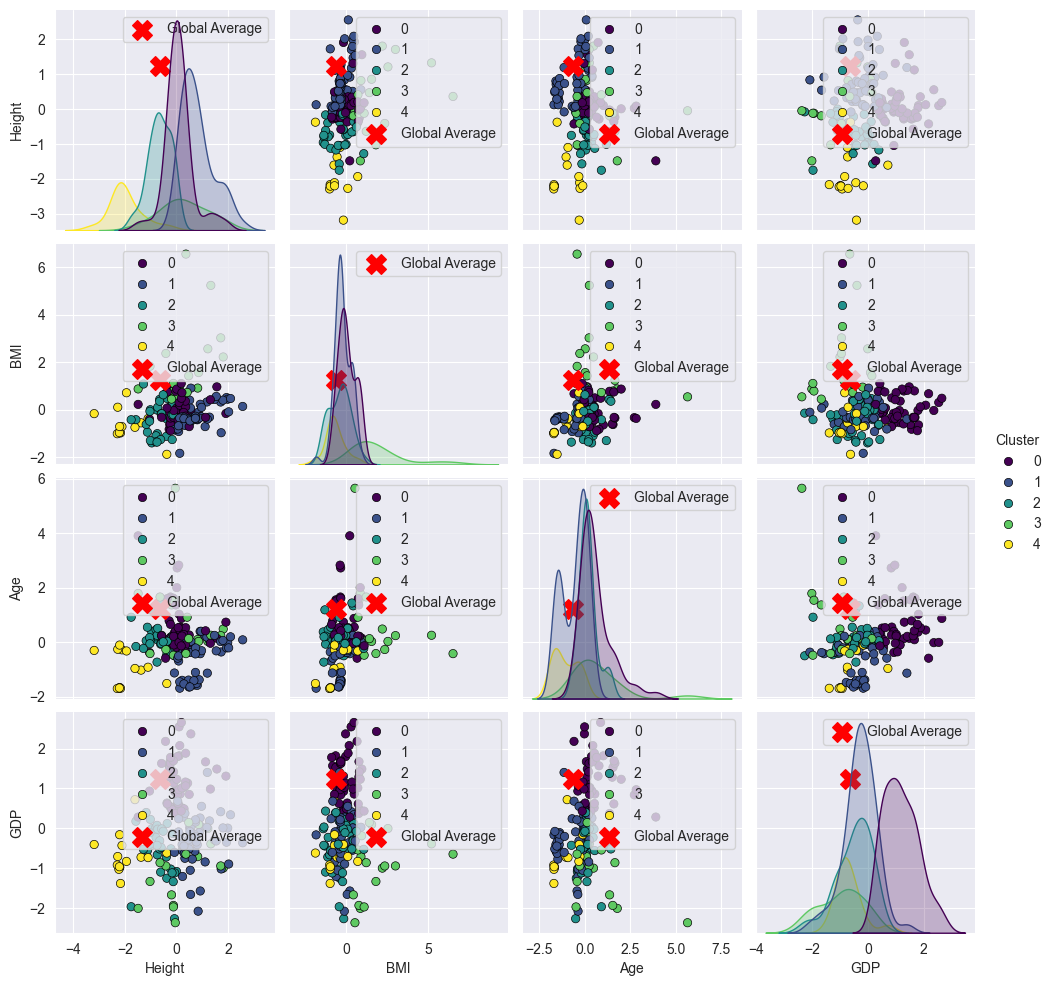

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to indicate if the point is the global average
bio_by_sport_female['Is_Global_Average'] = bio_by_sport_female['Event'] == 'Global average Female'

# Create a pairplot with hue based on the 'Cluster' column and highlight the global average
pairplot = sns.pairplot(bio_by_sport_female, 
                         hue='Cluster', 
                         vars=['Height', 'BMI', 'Age', 'GDP'], 
                         palette='viridis', 
                         plot_kws={'edgecolor': 'black'})

# Highlight the global average points
for ax in pairplot.axes.flatten():
    # Set the marker to X for global average points
    ax.scatter(bio_by_sport_female[bio_by_sport_female['Is_Global_Average']]['Height'], 
               bio_by_sport_female[bio_by_sport_female['Is_Global_Average']]['BMI'],
               color='red', s=200, label='Global Average', marker='X')
    ax.legend(loc='upper right')

# Show the plot
plt.show()


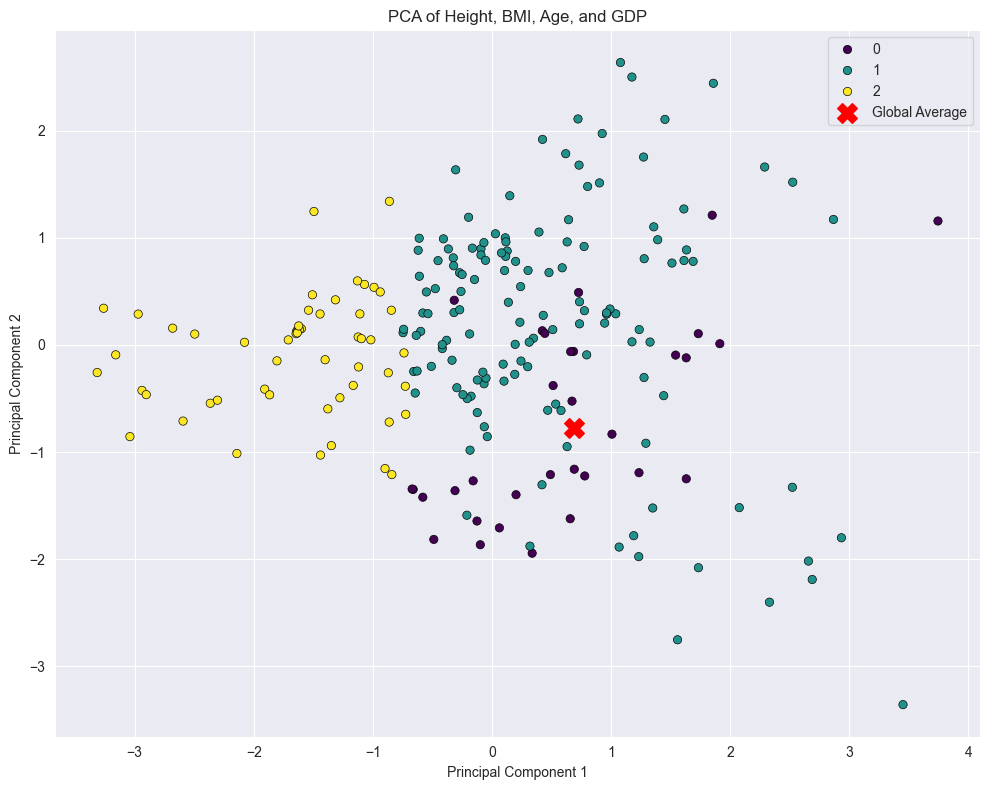

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features for PCA
features = ['Height', 'BMI', 'Age', 'GDP']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bio_by_sport_male[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = bio_by_sport_male['Cluster']
pca_df['Is_Global_Average'] = bio_by_sport_male['Is_Global_Average']

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', edgecolor='black')

# Highlight the global average point
global_avg_point = pca_df[pca_df['Is_Global_Average']]
plt.scatter(global_avg_point['PC1'], global_avg_point['PC2'], color='red', s=200, label='Global Average', marker='X')

# Set titles and labels
plt.title('PCA of Height, BMI, Age, and GDP')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

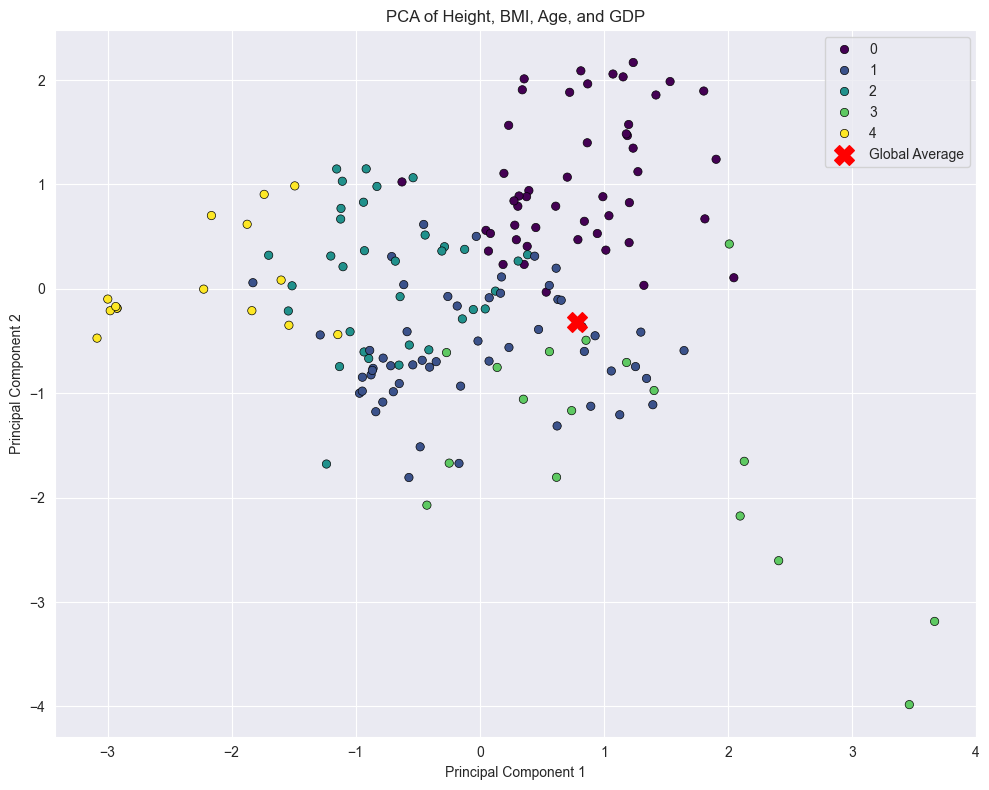

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features for PCA
features = ['Height', 'BMI', 'Age', 'GDP']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bio_by_sport_female[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = bio_by_sport_female['Cluster']
pca_df['Is_Global_Average'] = bio_by_sport_female['Is_Global_Average']

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', edgecolor='black')

# Highlight the global average point
global_avg_point = pca_df[pca_df['Is_Global_Average']]
plt.scatter(global_avg_point['PC1'], global_avg_point['PC2'], color='red', s=200, label='Global Average', marker='X')

# Set titles and labels
plt.title('PCA of Height, BMI, Age, and GDP')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
bio_by_sport_male.sort_values(by="Age")

,Event,Height,BMI,Age,GDP,Cluster,Is_Global_Average
161,"Swimming Men's 1,500 metres Freestyle",0.540652,-0.550123,-1.792282,-0.015153,1,False
175,Swimming Men's 400 metres Freestyle,0.671949,-0.432041,-1.700347,-0.042229,1,False
176,Swimming Men's 400 metres Individual Medley,0.573871,-0.500884,-1.626200,0.221676,1,False
167,Swimming Men's 200 metres Backstroke,0.805290,-0.543989,-1.607546,0.023381,1,False
170,Swimming Men's 200 metres Freestyle,1.007314,-0.398311,-1.559697,0.198018,1,False
...,...,...,...,...,...,...,...
130,Sailing Men's Two Person Keelboat,1.138256,1.286749,2.487196,3.269973,0,False
132,Sailing Mixed 5.5 metres,-0.029874,0.177617,2.567662,-1.529385,0,False
152,Shooting Men's Trap,-0.030560,1.098788,2.698037,0.187802,0,False
81,"Equestrianism Mixed Dressage, Individual",-0.069315,-0.388245,3.766498,0.947845,0,False


In [43]:
bio_by_sport_female.sort_values(by="Age")

,Event,Height,BMI,Age,GDP,Cluster,Is_Global_Average
76,Gymnastics Women's Team All-Around,-2.289014,-1.006386,-1.699443,-0.921828,4,False
74,Gymnastics Women's Horse Vault,-2.164506,-0.973044,-1.691816,-1.384866,4,False
75,Gymnastics Women's Individual All-Around,-2.226965,-0.966285,-1.689933,-1.030716,4,False
88,Rhythmic Gymnastics Women's Group,0.126346,-1.829245,-1.687867,-0.166840,1,False
77,Gymnastics Women's Uneven Bars,-2.208427,-0.959200,-1.679552,-0.965192,4,False
...,...,...,...,...,...,...,...
120,Shooting Women's Trap,0.010258,0.868426,2.000985,1.227868,0,False
58,"Equestrianism Mixed Dressage, Individual",0.025659,-0.330627,2.721853,0.836445,0,False
59,"Equestrianism Mixed Dressage, Team",0.087448,-0.363276,2.824234,0.967035,0,False
101,Sailing Mixed Three Person Keelboat,-1.482596,0.225226,3.900897,0.280722,0,False
